# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading data

In [2]:
data = pd.read_csv('Dataset.csv')
data.head(3)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2


## Checking for the shape of DataFrame

In [3]:
data.shape

(3333, 11)

## Extracting brief insight of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


## Checking for Missing Values

In [5]:
data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

## Checking for the duplicates

In [6]:
duplicate_rows = data[data.duplicated()]
duplicate_rows.shape

(0, 11)

## Checking for the OutLiers

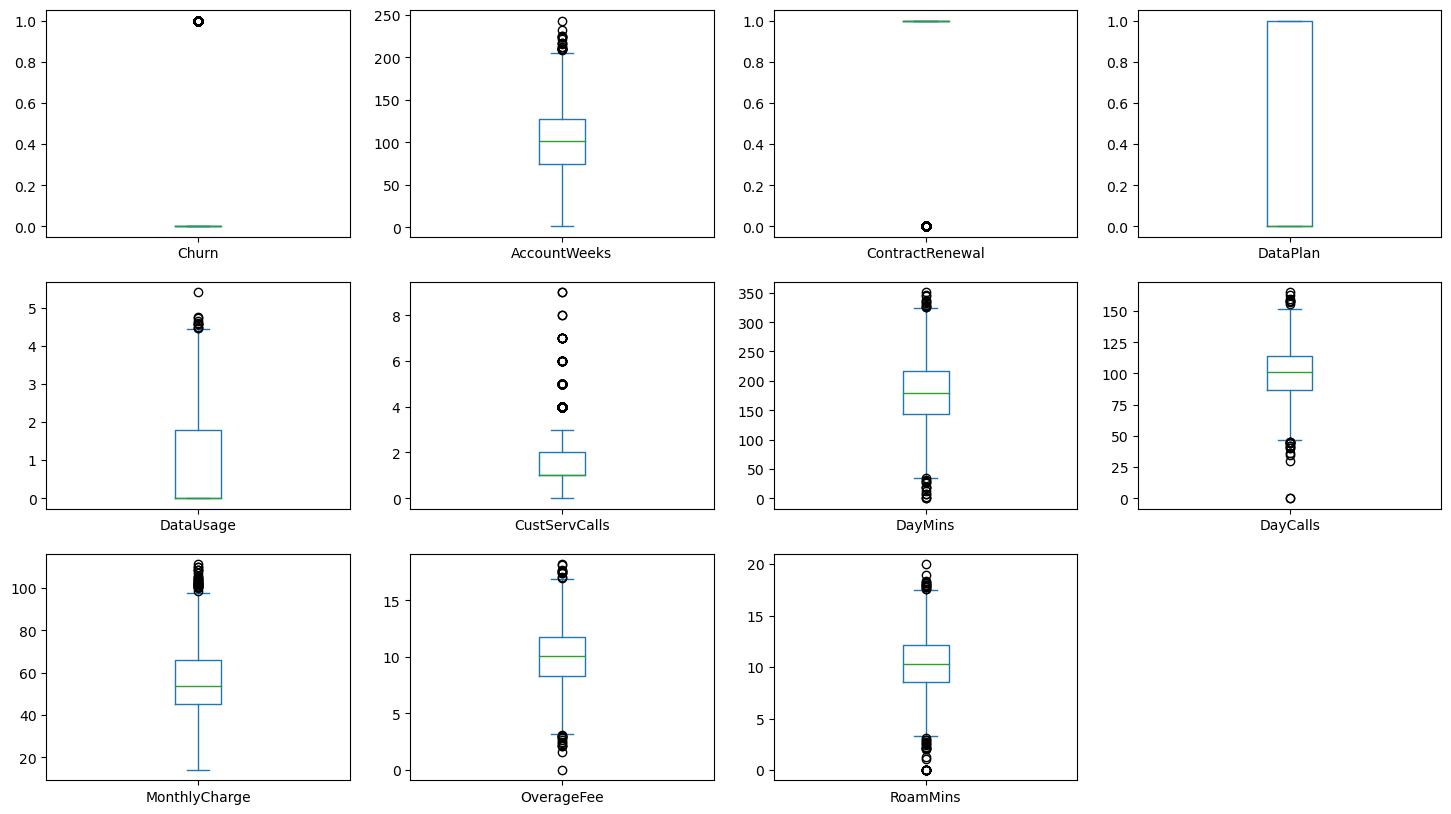

In [95]:
data.plot(kind = 'box',sharex=False, sharey=False,subplots = True,layout = (3, 4),figsize=(18,10));
plt.savefig("Churn_Outliers.png", format="png", bbox_inches="tight")

## Looking for statistical Summary of  Variables

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
AccountWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
ContractRenewal,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
DataPlan,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataUsage,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
CustServCalls,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
DayMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
DayCalls,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyCharge,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverageFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


# Univariate Analysis

## (1) Churn

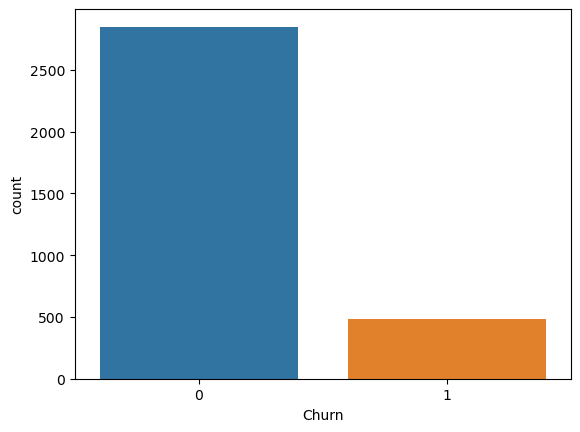

In [96]:
sns.countplot(data.Churn);
plt.savefig("Churn_Churn.png", format="png", bbox_inches="tight")

In [10]:
data.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [11]:
data.Churn.value_counts()/3333

0    0.855086
1    0.144914
Name: Churn, dtype: float64

## (2) AccountWeeks

In [12]:
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


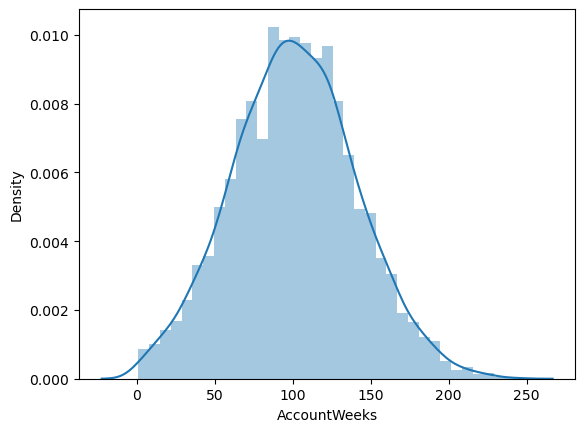

In [13]:
sns.distplot(data.AccountWeeks);

In [14]:
data.AccountWeeks.skew()

0.09660629423135147

## (3) ContractRenewal

In [15]:
data.ContractRenewal

0       1
1       1
2       1
3       0
4       0
       ..
3328    1
3329    1
3330    1
3331    0
3332    1
Name: ContractRenewal, Length: 3333, dtype: int64

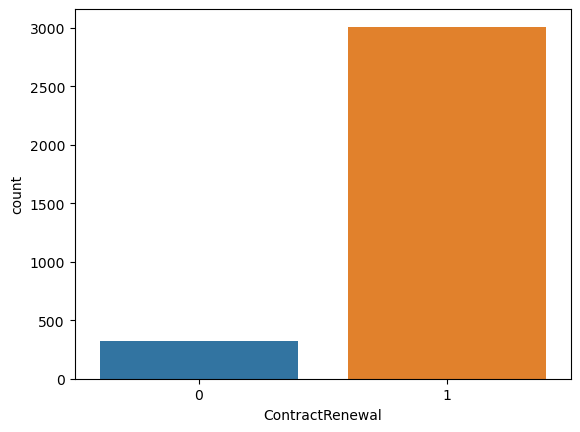

In [118]:
sns.countplot(data.ContractRenewal);
plt.savefig("ContRenw.png", format="png", bbox_inches="tight")

In [17]:
data.ContractRenewal.value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

## (4) DataPlan

In [18]:
data.DataPlan

0       1
1       1
2       0
3       0
4       0
       ..
3328    1
3329    0
3330    0
3331    0
3332    1
Name: DataPlan, Length: 3333, dtype: int64

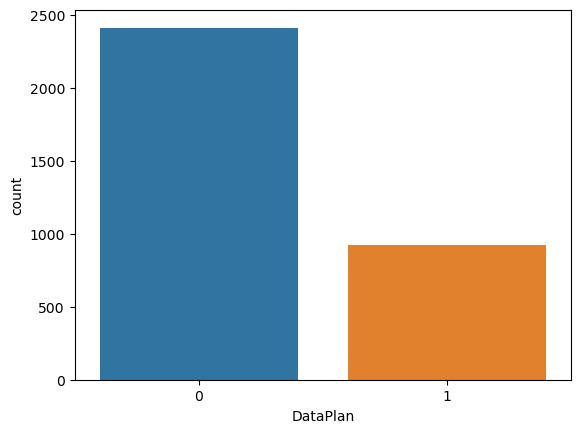

In [19]:
sns.countplot(data.DataPlan);

In [20]:
data.DataPlan.value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

## (5) DataUsage

In [21]:
data.DataUsage

0       2.70
1       3.70
2       0.00
3       0.00
4       0.00
        ... 
3328    2.67
3329    0.34
3330    0.00
3331    0.00
3332    3.70
Name: DataUsage, Length: 3333, dtype: float64

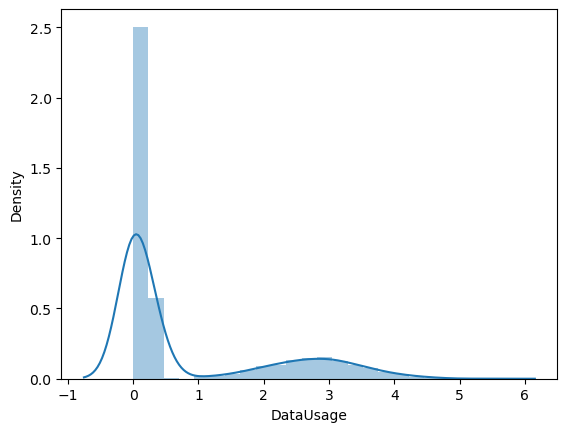

In [22]:
sns.distplot(data.DataUsage);
plt.savefig("DataUsage.png", format="png", bbox_inches="tight")


## (6) CustServCalls

In [23]:
data.CustServCalls

0       1
1       1
2       0
3       2
4       3
       ..
3328    2
3329    3
3330    2
3331    2
3332    0
Name: CustServCalls, Length: 3333, dtype: int64

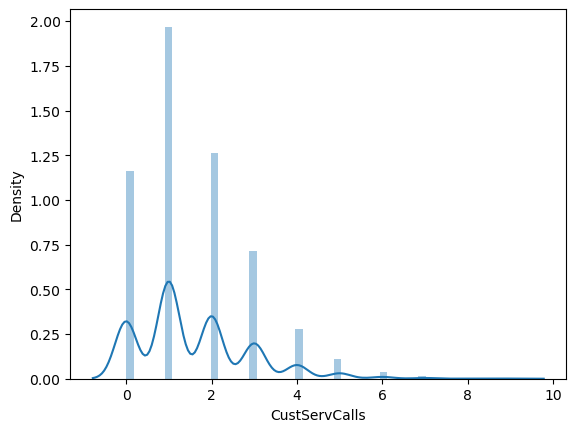

In [119]:
sns.distplot(data.CustServCalls);
plt.savefig("CustServCall.png", format="png", bbox_inches="tight")

## (7) DayMins

In [25]:
data.DayMins

0       265.1
1       161.6
2       243.4
3       299.4
4       166.7
        ...  
3328    156.2
3329    231.1
3330    180.8
3331    213.8
3332    234.4
Name: DayMins, Length: 3333, dtype: float64

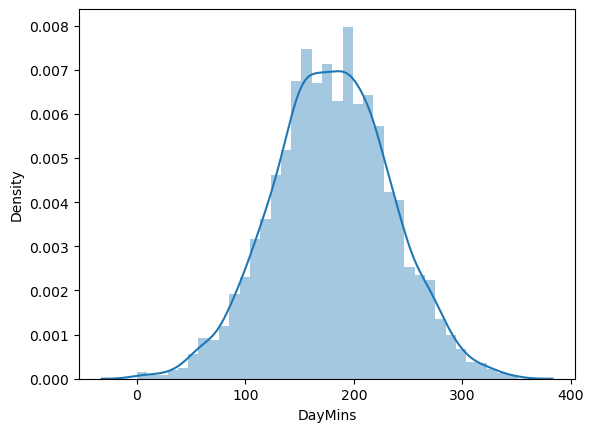

In [120]:
sns.distplot(data.DayMins);
plt.savefig("DayMins.png", format="png", bbox_inches="tight")

## (8) DayCalls

In [27]:
data.DayCalls

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: DayCalls, Length: 3333, dtype: int64

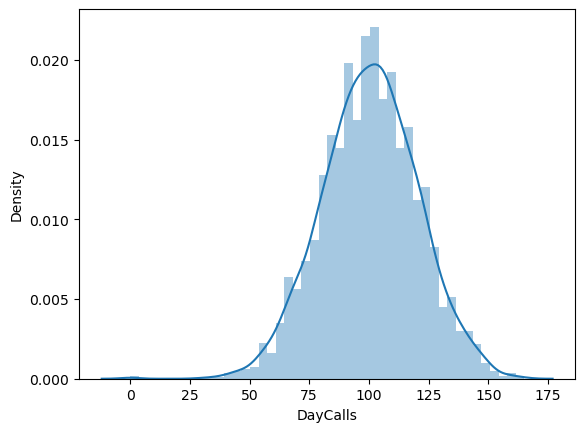

In [28]:
sns.distplot(data.DayCalls);

## (9) MonthlyCharge

In [29]:
data.MonthlyCharge

0        89.0
1        82.0
2        52.0
3        57.0
4        41.0
        ...  
3328     71.7
3329     56.4
3330     56.0
3331     50.0
3332    100.0
Name: MonthlyCharge, Length: 3333, dtype: float64

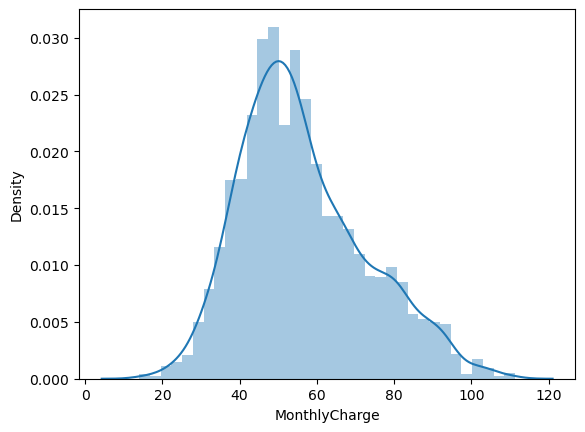

In [30]:
sns.distplot(data.MonthlyCharge);

## (10) OverageFee

In [31]:
data.OverageFee

0        9.87
1        9.78
2        6.06
3        3.10
4        7.42
        ...  
3328    10.78
3329     7.67
3330    14.44
3331     7.98
3332    13.30
Name: OverageFee, Length: 3333, dtype: float64

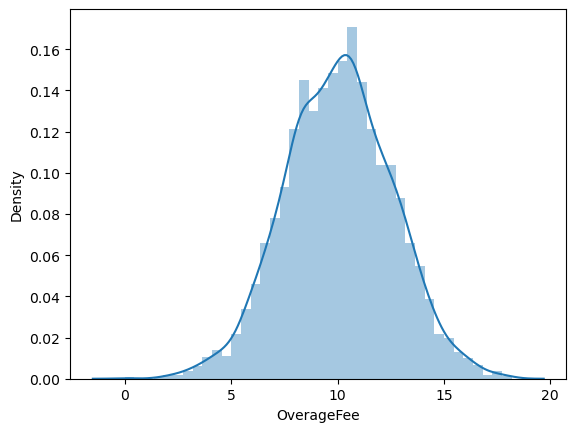

In [121]:
sns.distplot(data.OverageFee);
plt.savefig("OverageFee.png", format="png", bbox_inches="tight")

## (11) RoamMins

In [33]:
data.RoamMins

0       10.0
1       13.7
2       12.2
3        6.6
4       10.1
        ... 
3328     9.9
3329     9.6
3330    14.1
3331     5.0
3332    13.7
Name: RoamMins, Length: 3333, dtype: float64

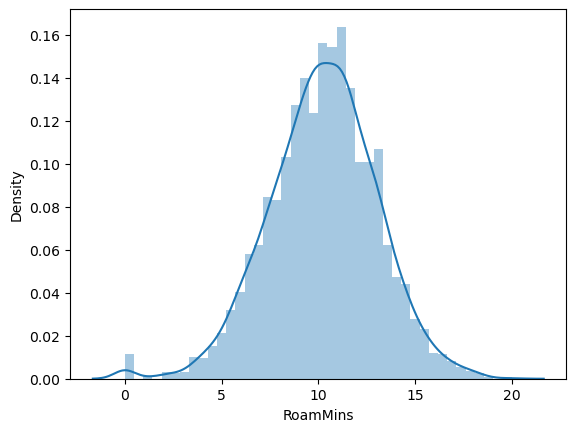

In [122]:
sns.distplot(data.RoamMins);
plt.savefig("RoamMins.png", format="png", bbox_inches="tight")

# BIVARIATE ANALYSIS:-

## (1) Churn Vs AccountWeeks 

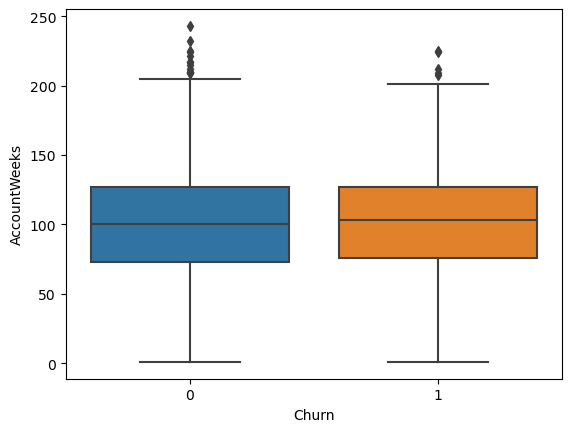

In [35]:
sns.boxplot(data.Churn,data.AccountWeeks);

In [36]:
from scipy import stats
your_data = data
# Separate the data into two groups
group1 = your_data[your_data['Churn'] == 0]['AccountWeeks']
group2 = your_data[your_data['Churn'] == 1]['AccountWeeks']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is no significant difference between the groups.


## (2) Churn Vs ContractRenewal

In [37]:
contingency_table = pd.crosstab(data['Churn'],data['ContractRenewal'])
print(contingency_table)

ContractRenewal    0     1
Churn                     
0                186  2664
1                137   346


In [38]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05

if p < alpha:
    print('There is significant assosiation')
else:
    print('There is no significant association')

Chi-Squared Statistic: 222.56575664993764
P-value: 2.4931077033159204e-50
There is significant assosiation


## (3) Churn Vs DataPlan

In [39]:
contingency_table = pd.crosstab(data['Churn'],data['DataPlan'])
print(contingency_table)

DataPlan     0    1
Churn              
0         2008  842
1          403   80


In [40]:
# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the chi-squared statistic and p-value
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")

alpha = 0.05

if p < alpha:
    print('There is significant assosiation')
else:
    print('There is no significant association')

Chi-Squared Statistic: 34.13166001075673
P-value: 5.15063965903898e-09
There is significant assosiation


## (4) Churn Vs DataUsage

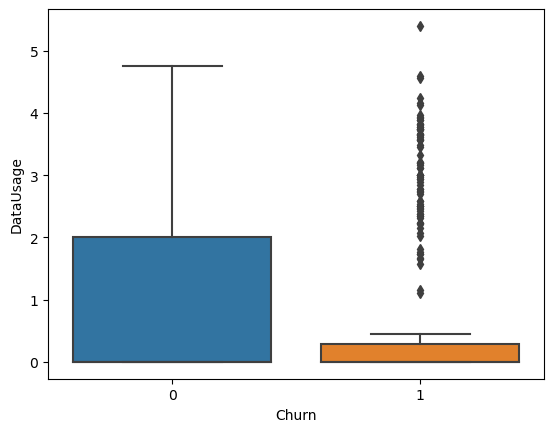

In [97]:
sns.boxplot(data.Churn, data.DataUsage)
plt.savefig("Churn_DataUsages.png", format="png", bbox_inches="tight")

In [42]:
from scipy import stats

# Separate the data into two groups
group1 = data[data['Churn'] == 0]['DataUsage']
group2 = data[data['Churn'] == 1]['DataUsage']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is a significant difference between the groups.


## (5) Churn Vs CustServCalls

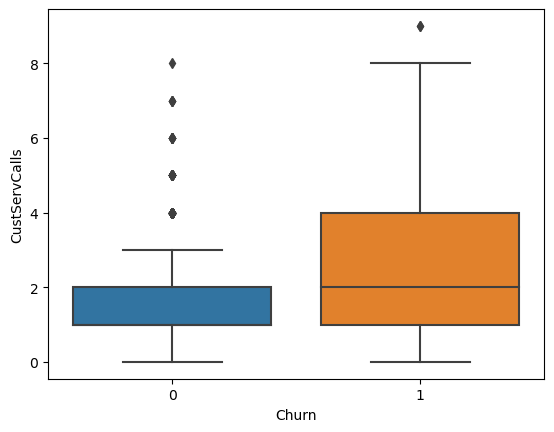

In [98]:
sns.boxplot(data.Churn,data.CustServCalls);
plt.savefig("Churn_CustServCalls.png", format="png", bbox_inches="tight")

In [44]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['CustServCalls']
group2 = data[data['Churn'] == 1]['CustServCalls']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is a significant difference between the groups.


## (6) Churn Vs DayMins

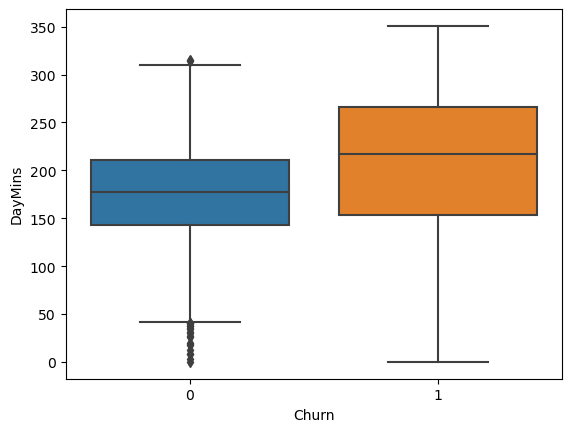

In [99]:
sns.boxplot(data.Churn,data.DayMins);
plt.savefig("Churn_DayMins.png", format="png", bbox_inches="tight")

In [46]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['DayMins']
group2 = data[data['Churn'] == 1]['DayMins']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is a significant difference between the groups.


## (7) Churn Vs DayCalls

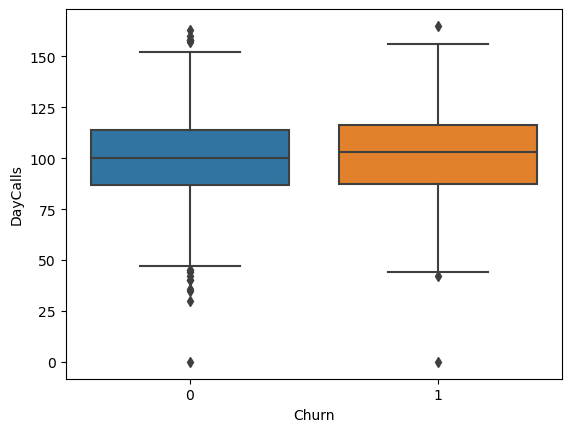

In [100]:
sns.boxplot(data.Churn,data.DayCalls);

In [48]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['DayCalls']
group2 = data[data['Churn'] == 1]['DayCalls']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is no significant difference between the groups.


## (8) Churn Vs MonthlyCharge

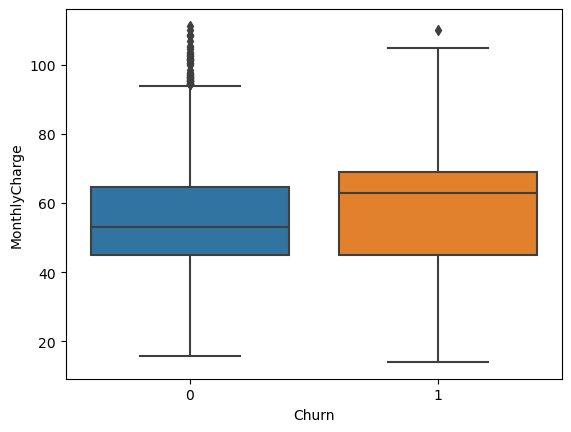

In [101]:
sns.boxplot(data.Churn, data.MonthlyCharge);

In [50]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['DayCalls']
group2 = data[data['Churn'] == 1]['DayCalls']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is no significant difference between the groups.


## (9) Churn Vs OverageFee

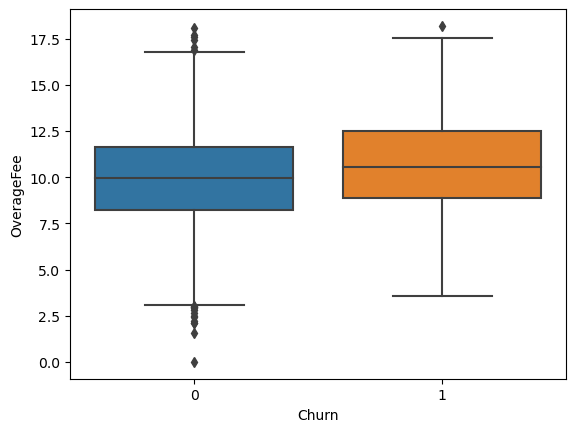

In [102]:
sns.boxplot(data.Churn,data.OverageFee);
plt.savefig("Churn_OverageFee.png", format="png", bbox_inches="tight")

In [52]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['OverageFee']
group2 = data[data['Churn'] == 1]['OverageFee']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")

There is a significant difference between the groups.


## (10) Churn Vs RoamMins

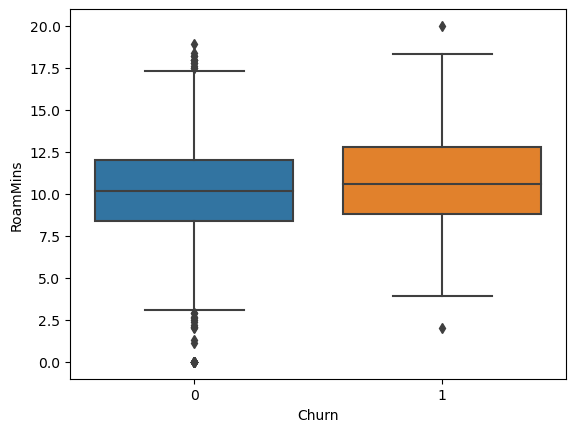

In [103]:
sns.boxplot(data.Churn,data.RoamMins);
plt.savefig("Churn_RoamMins.png", format="png", bbox_inches="tight")

In [54]:
# Separate the data into two groups
group1 = data[data['Churn'] == 0]['RoamMins']
group2 = data[data['Churn'] == 1]['RoamMins']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=True)

# Check the p-value to determine statistical significance
if p_value < 0.05:  # You can choose your desired significance level
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


There is a significant difference between the groups.


# Preparing Data For ML Algorithms

## (1) Seperating Target and Predictor Variables

In [55]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
X.shape,y.shape

((3333, 10), (3333,))

## (2) Splitting dataset into Train and Test

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2666, 10), (667, 10), (2666,), (667,))

In [57]:
y_train.value_counts() # Here train is only consists of negative class because of the imbalanced data

0    2278
1     388
Name: Churn, dtype: int64

## (3) Feature Scaling using MinMax Scaler

In [58]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X_train = pd.DataFrame(MM.fit_transform(X_train),columns = X_train.columns)
X_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.739669,1.0,1.0,0.379630,0.111111,0.668397,0.472727,0.683453,0.606735,0.380
1,0.227273,1.0,1.0,0.635185,0.111111,0.350923,0.527273,0.588900,0.459411,0.635
2,0.413223,1.0,0.0,0.000000,0.444444,0.456747,0.557576,0.298047,0.471437,0.675
3,0.491736,1.0,0.0,0.000000,0.111111,0.475779,0.606061,0.431655,0.859892,0.415
4,0.322314,1.0,0.0,0.000000,0.222222,0.682814,0.818182,0.441932,0.466627,0.520
...,...,...,...,...,...,...,...,...,...,...
2661,0.314050,1.0,1.0,0.485185,0.222222,0.608708,0.539394,0.690647,0.578473,0.485
2662,0.454545,1.0,0.0,0.000000,0.000000,0.820069,0.539394,0.493320,0.378232,0.420
2663,0.388430,1.0,1.0,0.594444,0.000000,0.117935,0.763636,0.381295,0.307276,0.595
2664,0.119835,1.0,0.0,0.000000,0.000000,0.713379,0.648485,0.452210,0.435358,0.565


## (4) Treating imbalanced target variable

In [59]:
from imblearn.over_sampling import SMOTE

SM = SMOTE(sampling_strategy='auto',k_neighbors=1,random_state=10)

In [60]:
X_resample,y_resample = SM.fit_resample(X_train,y_train)

In [61]:
y_train.value_counts()

0    2278
1     388
Name: Churn, dtype: int64

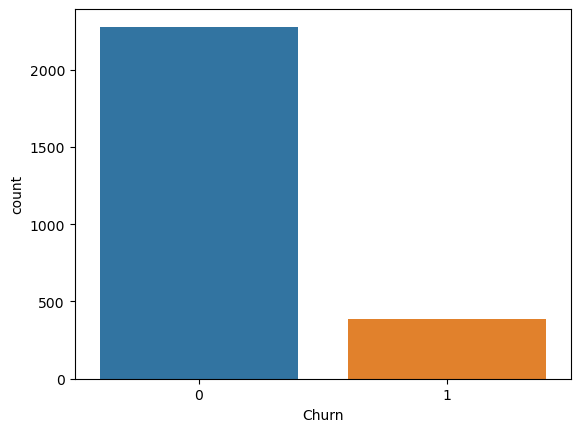

In [104]:
sns.countplot(y_train);
plt.savefig("y_train.png", format="png", bbox_inches="tight")

In [63]:
y_resample.value_counts()

0    2278
1    2278
Name: Churn, dtype: int64

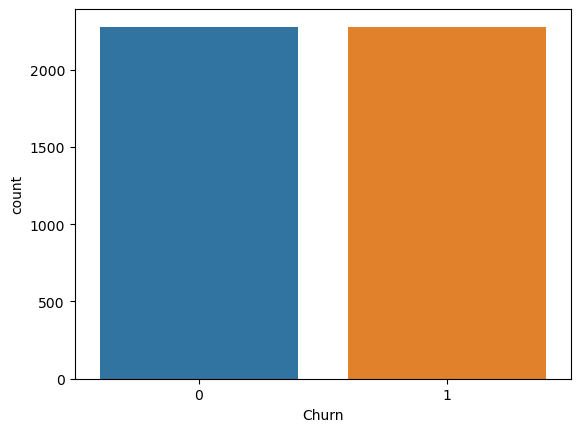

In [105]:
sns.countplot(y_resample);
plt.savefig("y_resample.png", format="png", bbox_inches="tight")

# Traing the Model using Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_resample,y_resample)

LogisticRegression()

### -------------------------------Model - 1

## Predicting the Labels for corresponding X_resample

In [66]:
y_resemple_Predic = clf.predict(X_resample)

## Performance Measure Matrices {Confusion Matrix}, {Accuracy_Score}, {Classification_Report}

In [67]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [68]:
print(confusion_matrix(y_resample,y_resemple_Predic))

[[1775  503]
 [ 528 1750]]


In [107]:
cm = confusion_matrix(y_resample,y_resemple_Predic)

labels = ["Negative", "Positive"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

          Negative  Positive
Negative      1775       503
Positive       528      1750


In [69]:
accuracy_score(y_resample,y_resemple_Predic)

0.7737050043898156

In [70]:
print(classification_report(y_resample,y_resemple_Predic))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2278
           1       0.78      0.77      0.77      2278

    accuracy                           0.77      4556
   macro avg       0.77      0.77      0.77      4556
weighted avg       0.77      0.77      0.77      4556



### -------------------------------Model - 2

In [71]:
X_resample.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.739669,1.0,1.0,0.379630,0.111111,0.668397,0.472727,0.683453,0.606735,0.380
1,0.227273,1.0,1.0,0.635185,0.111111,0.350923,0.527273,0.588900,0.459411,0.635
2,0.413223,1.0,0.0,0.000000,0.444444,0.456747,0.557576,0.298047,0.471437,0.675
3,0.491736,1.0,0.0,0.000000,0.111111,0.475779,0.606061,0.431655,0.859892,0.415
4,0.322314,1.0,0.0,0.000000,0.222222,0.682814,0.818182,0.441932,0.466627,0.520


In [72]:
# Dropping Irrelivent Variable 
X_resample_2 = X_resample.drop(['AccountWeeks','DayCalls','MonthlyCharge'],axis=1)
X_resample_2.head(3)

,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,OverageFee,RoamMins
0,1.0,1.0,0.379630,0.111111,0.668397,0.606735,0.380
1,1.0,1.0,0.635185,0.111111,0.350923,0.459411,0.635
2,1.0,0.0,0.000000,0.444444,0.456747,0.471437,0.675


In [73]:
clf.fit(X_resample_2,y_resample)

LogisticRegression()

In [74]:
y_resample_pred = clf.predict(X_resample_2)

In [75]:
print(confusion_matrix(y_resample,y_resample_pred))

[[1769  509]
 [ 533 1745]]


In [108]:
cm = confusion_matrix(y_resample,y_resample_pred)

labels = ["Negative", "Positive"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

          Negative  Positive
Negative      1770       508
Positive       524      1754


In [76]:
accuracy_score(y_resample,y_resample_pred)

0.7712906057945567

In [77]:
print(classification_report(y_resample,y_resample_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2278
           1       0.77      0.77      0.77      2278

    accuracy                           0.77      4556
   macro avg       0.77      0.77      0.77      4556
weighted avg       0.77      0.77      0.77      4556



### -------------------------------Model - 3

In [109]:
#dropping DataPlan
X_resample_3 = X_resample_2.drop(['DataPlan'],axis=1)
X_resample_3.head()

,ContractRenewal,DataUsage,CustServCalls,DayMins,OverageFee,RoamMins
0,1.0,0.379630,0.111111,0.668397,0.606735,0.380
1,1.0,0.635185,0.111111,0.350923,0.459411,0.635
2,1.0,0.000000,0.444444,0.456747,0.471437,0.675
3,1.0,0.000000,0.111111,0.475779,0.859892,0.415
4,1.0,0.000000,0.222222,0.682814,0.466627,0.520


In [110]:
clf.fit(X_resample_3,y_resample)

LogisticRegression()

In [111]:
y_resample_pred = clf.predict(X_resample_3)

In [112]:
print(confusion_matrix(y_resample,y_resample_pred))

[[1770  508]
 [ 524 1754]]


In [114]:
cm = confusion_matrix(y_resample,y_resample_pred)

labels = ["Negative", "Positive"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

          Negative  Positive
Negative      1770       508
Positive       524      1754


In [113]:
print(classification_report(y_resample,y_resample_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      2278
           1       0.78      0.77      0.77      2278

    accuracy                           0.77      4556
   macro avg       0.77      0.77      0.77      4556
weighted avg       0.77      0.77      0.77      4556



# Prepairing test_data for  model validation

In [83]:
X_test = pd.DataFrame(MM.fit_transform(X_test),columns = X_test.columns)
X_test = X_test.drop(['AccountWeeks','DayCalls','MonthlyCharge','DataPlan'],axis=1)
X_test.head()

,ContractRenewal,DataUsage,CustServCalls,DayMins,OverageFee,RoamMins
0,1.0,0.000000,0.285714,0.436134,0.439704,0.945355
1,1.0,0.484305,0.000000,0.630040,0.624005,0.437158
2,0.0,0.000000,0.285714,0.295783,0.626280,0.590164
3,1.0,0.076233,0.000000,0.469067,0.537543,0.797814
4,1.0,0.000000,0.142857,0.113881,0.656997,0.464481


In [84]:
clf.fit(X_test,y_test)

LogisticRegression()

In [85]:
y_test_Pred = clf.predict(X_test)

In [86]:
print(confusion_matrix(y_test,y_test_Pred))

[[570   2]
 [ 90   5]]


In [115]:
cm = confusion_matrix(y_test,y_test_Pred)

labels = ["Negative", "Positive"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

          Negative  Positive
Negative       570         2
Positive        90         5


In [87]:
accuracy_score(y_test,y_test_Pred)

0.8620689655172413

In [88]:
print(classification_report(y_test,y_test_Pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       572
           1       0.71      0.05      0.10        95

    accuracy                           0.86       667
   macro avg       0.79      0.52      0.51       667
weighted avg       0.84      0.86      0.81       667



'''The LogisticRegression algorithm works on probability threshold (by default it is 0.5)

and so far all the metrics that we have analysed works on threshold.

To judge the performance of our model in better way, we should go for ROC_AUC score.'''

## ROC_AUC score

In [89]:
from sklearn.metrics import roc_curve,roc_auc_score

probability = clf.predict_proba(X_test)[:,1]

fpr,tpr,thresholds = roc_curve(y_test,probability,drop_intermediate=False)
auc = roc_auc_score(y_test,probability)
auc

0.8141884431358115

## Plotting the AUC

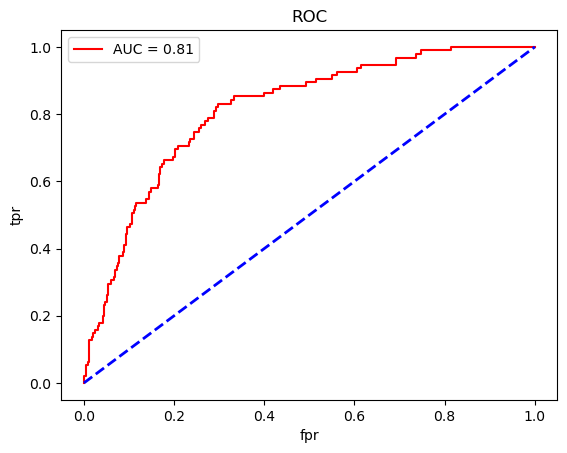

In [116]:
plt.figure()
plt.plot(fpr,tpr,'r',label='AUC = %0.2f' %auc)
plt.plot([0,1],[0,1],'b',linestyle='--',lw=2)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC')
plt.legend(loc ='best');
plt.savefig("ROC.png", format="png", bbox_inches="tight")

## optimizing the model using precision and recall scrore

In [91]:
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import precision_recall_curve

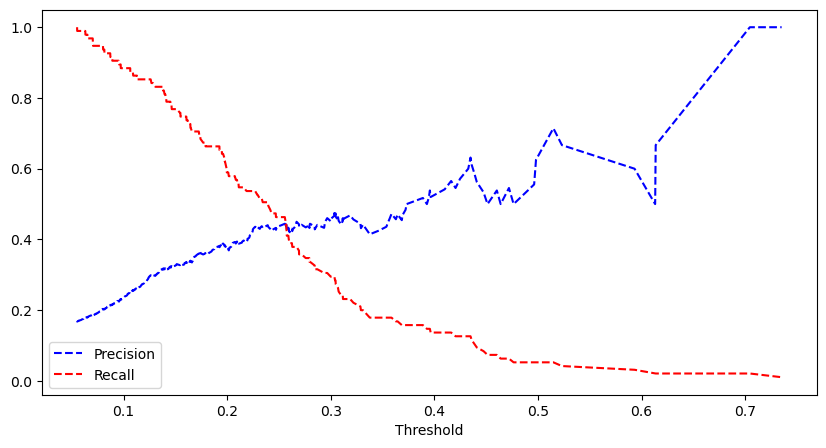

In [117]:
precision,recall,thresholds = precision_recall_curve(y_test,probability)

plt.figure(figsize=(10,5))
plt.plot(thresholds,precision[:-1],'b--',label='Precision')
plt.plot(thresholds,recall[:-1],'r--',label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='best');
plt.savefig("precision_recall_curve.png", format="png", bbox_inches="tight")

### In this case we need optimum threshold for our requirement,then we can set the threshold of 0.25

In [129]:
threshold = 0.25
new_prob = np.where(probability >= threshold,1,0)

In [130]:
print(confusion_matrix(y_test,new_prob))

[[516  56]
 [ 51  44]]


In [131]:
cm = confusion_matrix(y_test,new_prob)

labels = ["Negative", "Positive"]
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

print(cm_df)

          Negative  Positive
Negative       516        56
Positive        51        44


In [133]:
print(classification_report(y_test,new_prob))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       572
           1       0.44      0.46      0.45        95

    accuracy                           0.84       667
   macro avg       0.68      0.68      0.68       667
weighted avg       0.84      0.84      0.84       667



## Checking with arbitrary Data point

In [132]:
y_prd = clf.predict([[1,0.4843, 0.00, 0.630,0.624,0.438]])
y_prd

array([0], dtype=int64)